In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import diopy
import matplotlib.pyplot as plt

In [2]:
sc.__version__

'1.9.1'

In [4]:
adata = sc.read_10x_h5("/media/chang/HDD-9/chang/merged1.h5")
for filename in ["/media/chang/HDD-9/chang/merged2.h5","/media/chang/HDD-9/chang/merged3.h5"]:
    tmp = sc.read_10x_h5(filename)
    adata = adata.concatenate(tmp, index_unique=None)
adata

/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/scanpy/readwrite.py:281: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(
/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/scanpy/readwrite.py:281: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. 

AnnData object with n_obs × n_vars = 2682875 × 37481
    obs: 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [5]:
#adata.write("/media/chang/HDD-9/chang/merged.h5ad")

In [ ]:
diopy.output.write_h5(adata, file = '/media/chang/HDD-9/chang/merged.h5')

In [3]:
adata = sc.read("/media/chang/HDD-9/chang/merged.h5ad")

In [4]:
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"
ribo_genes = pd.read_table(ribo_url, header=[1]).iloc[:, 0].values.tolist()
ribo_genes.extend(adata.var.gene_ids[adata.var_names.str.startswith('MT-')].values.tolist())
ribo_genes.extend(adata.var.gene_ids[adata.var_names.str.startswith('MALAT')].values.tolist())
ribo_genes = pd.DataFrame({'col':ribo_genes})


ribo_mk = np.in1d(adata.var_names.values.astype(str), ribo_genes)
adata = adata[:,~ribo_mk]
sc.pp.filter_genes(adata, min_cells=10)
adata.X = np.rint(adata.X)
adata.X

/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


<2682875x36021 sparse matrix of type '<class 'numpy.float32'>'
	with 4866996596 stored elements in Compressed Sparse Row format>

In [5]:
sc.experimental.pp.recipe_pearson_residuals(adata,chunksize=1000,n_top_genes=3000,n_comps=100)

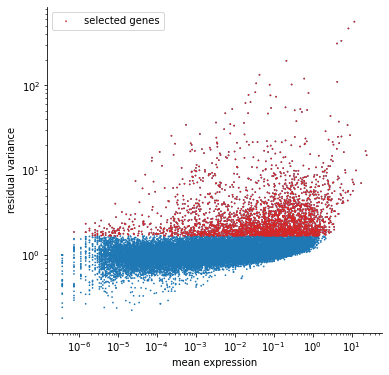

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
hvgs = adata.var["highly_variable"]

ax.scatter(
    adata.var["means"], adata.var["residual_variances"], s=3, edgecolor="none"
)
ax.scatter(
    adata.var["means"][hvgs],
    adata.var["residual_variances"][hvgs],
    c="tab:red",
    label="selected genes",
    s=3,
    edgecolor="none",
)
ax.set_xscale("log")
ax.set_xlabel("mean expression")
ax.set_yscale("log")
ax.set_ylabel("residual variance")

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.set_ticks_position("left")
ax.xaxis.set_ticks_position("bottom")
plt.legend()

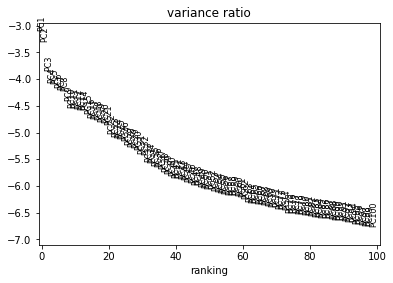

In [7]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=100)

In [8]:
sc.pp.neighbors(adata, n_pcs=100)
sc.tl.umap(adata)

/home/chang/miniconda3/envs/venv3.8/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [32]:
adata.obs = pd.read_csv('/media/chang/HDD-9/chang/meta.csv',header=0)
adata.obs 

/tmp/ipykernel_1897427/431153084.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  adata.obs = pd.read_csv('/media/chang/HDD-9/chang/meta.csv',header=0)


,orig.ident,nCount_RNA,nFeature_RNA,ident,cxds_score,bcds_score,hybrid_score,nCount_spliced,nFeature_spliced,nCount_unspliced,nFeature_unspliced,percent.mt,Sample,Chemistry,Area,Age
CGE_GW18_2_AAACCTGAGACATAAC_1,CGE_GW18_2,20255.000022,5633,CGE_GW18_2,154682.977352,0.425893,0.793150,15639,3970,3667,1995,4.823500,CGE_GW18_2,v2,GE,GW18
CGE_GW18_2_AAACCTGAGCCCGAAA_1,CGE_GW18_2,45071.000074,7242,CGE_GW18_2,244955.877459,0.834519,1.417413,38678,5967,3221,1911,2.345189,CGE_GW18_2,v2,GE,GW18
CGE_GW18_2_AAACCTGAGGGTCGAT_1,CGE_GW18_2,16083.999970,4402,CGE_GW18_2,33535.970212,0.104484,0.183534,13770,3535,1512,1014,3.892067,CGE_GW18_2,v2,GE,GW18
CGE_GW18_2_AAACCTGCAAGCCATT_1,CGE_GW18_2,3147.999999,1540,CGE_GW18_2,114804.455934,0.006750,0.277504,2332,1026,678,497,1.683609,CGE_GW18_2,v2,GE,GW18
CGE_GW18_2_AAACCTGCAAGGACTG_1,CGE_GW18_2,2138.999999,1274,CGE_GW18_2,6281.162128,0.001473,0.015525,2030,1178,26,26,5.329593,CGE_GW18_2,v2,GE,GW18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GW30_V1_TTTGGTTCATGTTGAC_9,GW30_V1,1292.000001,794,GW30_V1,11558.478488,0.071955,0.135449,830,486,328,252,2.786378,GW30,v2,Cortex,GW30
GW30_V1_TTTGGTTTCTTTACAC_9,GW30_V1,1367.999975,921,GW30_V1,13886.202521,0.098877,0.194331,845,524,426,327,1.461988,GW30,v2,Cortex,GW30
GW30_V1_TTTGGTTTCTTTCCTC_9,GW30_V1,1850.000004,1204,GW30_V1,17518.435397,0.130244,0.273813,1216,748,468,382,1.837838,GW30,v2,Cortex,GW30
GW30_V1_TTTGTCACAGATAATG_9,GW30_V1,4568.000002,2047,GW30_V1,44771.493509,0.909881,1.504266,3352,1334,863,627,0.394046,GW30,v2,Cortex,GW30


In [43]:
adata.obs['orig.ident'].value_counts()
#adata.obs[adata.obs['Sample'].isna()]

GW8_lane2_Hypo    64402
GW8_lane1_Hypo    56652
GW19_S1           51310
GW25_ParVZ        26103
GW20_3            24555
                  ...  
motor_34            153
putamen_34          134
GW16_PFC            133
GW16_MGE             58
GW14_MGE             13
Name: orig.ident, Length: 301, dtype: int64

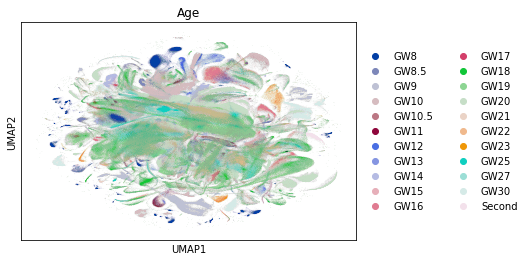

In [34]:
sc.pl.umap(adata, color=["Age"], cmap="tab20")

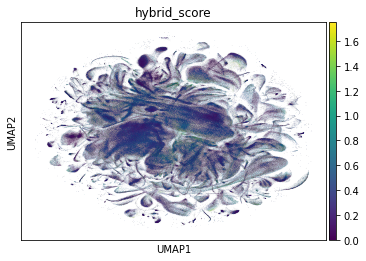

In [42]:
sc.pl.umap(adata, color=['hybrid_score'])#, use_raw=False)

In [41]:
adata.obsm['X_pca']

array([[-4.36484432e+00,  3.30888329e+01,  2.27801758e+02, ...,
         1.24655694e-01, -4.51885611e-02,  9.31518674e-01],
       [ 3.44811157e+02,  3.64855499e+01,  9.97122955e+01, ...,
        -3.12348518e+01,  1.22581968e+01,  4.44804573e+00],
       [-3.67665857e-01,  3.24443359e+01,  9.31628265e+01, ...,
         4.75727701e+00, -5.13527298e+00,  1.49613476e+01],
       ...,
       [-4.27356273e-01, -9.73280966e-01,  3.64360380e+00, ...,
         6.19026363e-01,  7.23376691e-01, -3.16858602e+00],
       [-1.98617589e+00,  4.91763401e+00,  1.90189266e+01, ...,
         2.58726597e+00,  3.98399091e+00, -5.06062269e+00],
       [ 1.75190836e-01,  6.70742929e-01,  4.97740698e+00, ...,
         1.14684212e+00,  1.49882162e+00, -1.79897678e+00]], dtype=float32)

In [35]:
adata.write("/media/chang/HDD-9/chang/merged_pearson.h5ad")

TypeError: Can't implicitly convert non-string objects to strings

Above error raised while writing key 'Sample' of <class 'h5py._hl.group.Group'> to /

In [3]:
adata = sc.read("/media/chang/HDD-9/chang/merged_pearson.h5ad")

In [8]:
adata

AnnData object with n_obs × n_vars = 2682875 × 37481
    obs: 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable'
    uns: 'hvg', 'pca', 'pearson_residuals_normalization', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'